w1:
 [[1.42857143]
 [1.71428571]]
w10:
 [[-3.38432657]]

w2:
 [[-1.14285714]
 [ 1.42857143]]
w20:
 [[-4.24146943]]

w3:
 [[-0.85714286]
 [-2.42857143]]
w30:
 [[-3.74146943]]


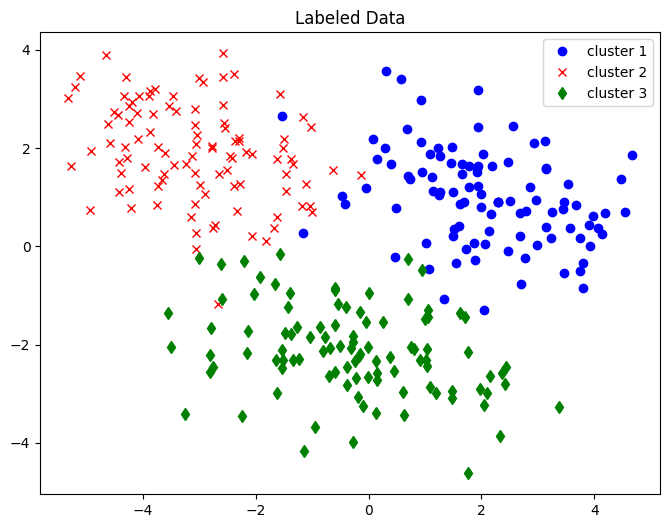

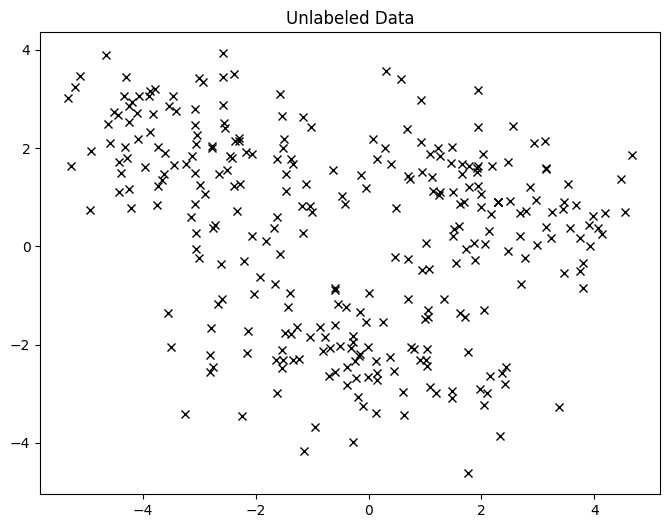

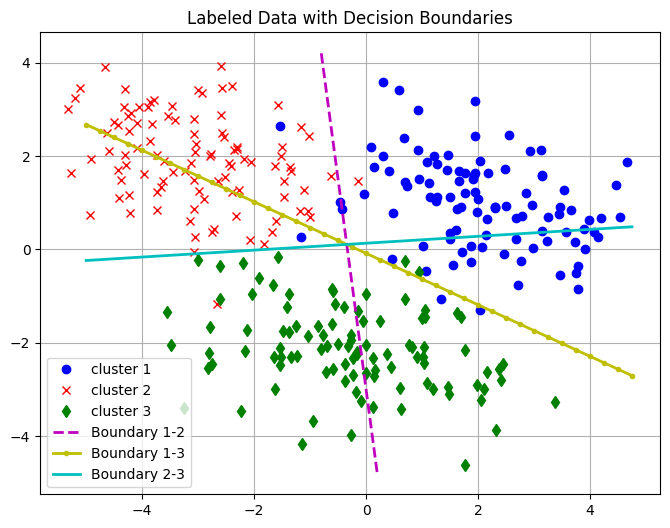

In [1]:

# Import the packages I will need
import numpy as np
import matplotlib.pyplot as plt

# Define covariance matrix and mean vectors for three classes
Sigma = np.array([[2, -0.5], [-0.5, 1]])
mu1 = np.array([[2], [1]])
mu2 = np.array([[-3], [2]])
mu3 = np.array([[-0.5], [-2]])

# Set the number of samples from each class
n = 100

# Generate data points for each class
X1 = np.random.multivariate_normal(mu1.flatten(), Sigma, n)
X2 = np.random.multivariate_normal(mu2.flatten(), Sigma, n)
X3 = np.random.multivariate_normal(mu3.flatten(), Sigma, n)

# Plot the labeled data
plt.figure(1, figsize=(8, 6))
plt.clf()
plt.plot(X1[:, 0], X1[:, 1], 'bo', label='cluster 1')
plt.plot(X2[:, 0], X2[:, 1], 'rx', label='cluster 2')
plt.plot(X3[:, 0], X3[:, 1], 'gd', label='cluster 3')
plt.legend()
plt.title('Labeled Data')
plt.draw()

# Plot the unlabeled data 
plt.figure(2, figsize=(8, 6))
plt.clf()
plt.plot(X1[:, 0], X1[:, 1], 'kx')
plt.plot(X2[:, 0], X2[:, 1], 'kx')
plt.plot(X3[:, 0], X3[:, 1], 'kx')
plt.title('Unlabeled Data')
plt.draw()

# Calculate the inverse of the common covariance matrix
invSigma = np.linalg.inv(Sigma)

# Calculate the discriminant function coefficients (w and w0) for each class
# w = inv(Sigma) * mu (see lecture slide)
w1 = invSigma @ mu1
w2 = invSigma @ mu2
w3 = invSigma @ mu3

# w0 = -0.5 * mu^T * inv(Sigma) * mu + log(P_i) (see lecture slide)
log_prior = np.log(1/3)
w10 = -0.5 * mu1.T @ invSigma @ mu1 + log_prior
w20 = -0.5 * mu2.T @ invSigma @ mu2 + log_prior
w30 = -0.5 * mu3.T @ invSigma @ mu3 + log_prior

# Print the discriminant function values
print("w1:\n", w1)
print("w10:\n", w10)
print("\nw2:\n", w2)
print("w20:\n", w20)
print("\nw3:\n", w3)
print("w30:\n", w30)

# Construct the boundaries by finding the difference between discriminant function parameters
w12 = w1 - w2
w23 = w2 - w3
w13 = w1 - w3

# Define the x-axis range for the plots
x_range_1 = np.arange(-0.8, 0.3, 0.1)
x_range_2 = np.arange(-5, 5, 0.25)

# Calculate the y-coordinates for each decision boundary line
# Boundary between 1 and 2: w12[0]*x + w12[1]*y + (w10-w20) = 0
x12 = ((w20 - w10) - w12[0] * x_range_1) / w12[1]

# Boundary between 1 and 3: w13[0]*x + w13[1]*y + (w10-w30) = 0
x13 = ((w30 - w10) - w13[0] * x_range_2) / w13[1]

# Boundary between 2 and 3: w23[0]*x + w23[1]*y + (w20-w30) = 0
x23 = ((w30 - w20) - w23[0] * x_range_2) / w23[1]

# Plot the labeled data with the decision boundaries computed above
plt.figure(3, figsize=(8, 6))
plt.clf()
plt.plot(X1[:, 0], X1[:, 1], 'bo', label='cluster 1')
plt.plot(X2[:, 0], X2[:, 1], 'rx', label='cluster 2')
plt.plot(X3[:, 0], X3[:, 1], 'gd', label='cluster 3')
plt.plot(x_range_1, x12.flatten(), 'm--', linewidth=2, label='Boundary 1-2')
plt.plot(x_range_2, x13.flatten(), 'y.-', linewidth=2, label='Boundary 1-3')
plt.plot(x_range_2, x23.flatten(), 'c', linewidth=2, label='Boundary 2-3')
plt.legend()
plt.title('Labeled Data with Decision Boundaries')
plt.grid(True)
plt.show()



w1:
 [[1.42857143]
 [1.71428571]]
w10:
 [[-3.38432657]]
w2:
 [[-1.14285714]
 [ 1.42857143]]
w20:
 [[-4.24146943]]
w3:
 [[-0.85714286]
 [-2.42857143]]
w30:
 [[-3.74146943]]
MLE_w1:
 [1.17621602 1.62685804]
MLE_w10:
 -2.9805675791021056
MLE_w2:
 [-1.11981256  1.96302084]
MLE_w20:
 -4.884583810766216
MLE_w3:
 [-0.71556121 -2.4593256 ]
MLE_w30:
 -3.599169201181345


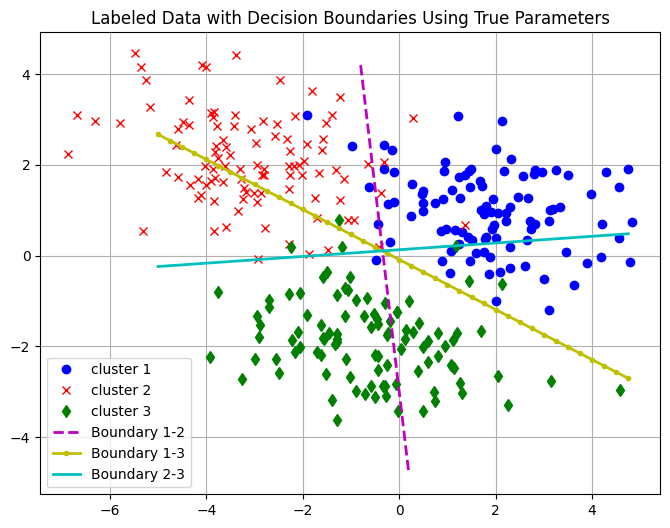

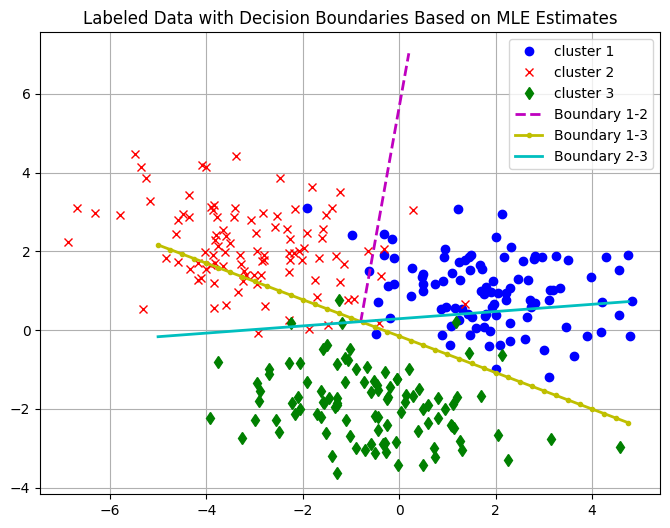

In [1]:
# This code constructs the optimal classifier for Gaussian case
# First, it uses true Gaussian parameters
# Second, it uses the MLE estimates of the Gaussian parameters
import numpy as np
import matplotlib.pyplot as plt

# Clear plots and set up the figure 

# Define covariance matrix and means for three classes
Sigma = np.array([[2, -0.5], [-0.5, 1]])

mu1 = np.array([[2], [1]])
mu2 = np.array([[-3], [2]])
mu3 = np.array([[-0.5], [-2]])

# See the number of samples from each class 
n = 100

# Generate data points for each class 
X1 = np.random.multivariate_normal(mu1.flatten(), Sigma, n)
X2 = np.random.multivariate_normal(mu2.flatten(), Sigma, n)
X3 = np.random.multivariate_normal(mu3.flatten(), Sigma, n)

# Calculate the inverse of the covariance matrix
invSigma = np.linalg.inv(Sigma)

# Calculate the discriminant coefficients (w and w0) for each class
# w = inv(Sigma) * mu (see lecture slide)
w1 = invSigma @ mu1
w2 = invSigma @ mu2
w3 = invSigma @ mu3

# w0 = -0.5 * mu^T * inv(Sigma) * mu + log(P_i) (see lecture slide)
log_prior = np.log(1/3)
w10 = -0.5 * mu1.T @ invSigma @ mu1 + log_prior
w20 = -0.5 * mu2.T @ invSigma @ mu2 + log_prior
w30 = -0.5 * mu3.T @ invSigma @ mu3 + log_prior

# Print the discriminant values
print("w1:\n", w1)
print("w10:\n", w10)
print("w2:\n", w2)
print("w20:\n", w20)
print("w3:\n", w3)
print("w30:\n", w30)

# Construct the boundaries by finding the difference between discriminant 
# parameters using true parameters
w12 = w1 - w2
w23 = w2 - w3
w13 = w1 - w3

# Define the x-axis range for the plots
x_range_1 = np.arange(-0.8, 0.3, 0.1)
x_range_2 = np.arange(-5, 5, 0.25)

# Calculate the y-coordinates for each decision boundary line
# Boundary between 1 and 2: w12[0]*x + w12[1]*y + (w10-w20) = 0
x12 = ((w20 - w10) - w12[0] * x_range_1) / w12[1]

# Boundary between 1 and 3: w13[0]*x + w13[1]*y + (w10-w30) = 0
x13 = ((w30 - w10) - w13[0] * x_range_2) / w13[1]

# Boundary between 2 and 3: w23[0]*x + w23[1]*y + (w20-w30) = 0
x23 = ((w30 - w20) - w23[0] * x_range_2) / w23[1]

# Plot the labeled data with the decision boundaries
plt.figure(3, figsize=(8, 6))
plt.clf()
plt.plot(X1[:, 0], X1[:, 1], 'bo', label='cluster 1')
plt.plot(X2[:, 0], X2[:, 1], 'rx', label='cluster 2')
plt.plot(X3[:, 0], X3[:, 1], 'gd', label='cluster 3')
plt.plot(x_range_1, x12.flatten(), 'm--', linewidth=2, label='Boundary 1-2')
plt.plot(x_range_2, x13.flatten(), 'y.-', linewidth=2, label='Boundary 1-3')
plt.plot(x_range_2, x23.flatten(), 'c', linewidth=2, label='Boundary 2-3')
plt.legend()
plt.title('Labeled Data with Decision Boundaries Using True Parameters')
plt.grid(True)
plt.draw()


# Now we will perform MLE on each Gaussian class instead of assuming
# that the distributions are known exactly. Then, we will use the
# estimates to find the boundaries

MLE_mu1 = np.sum(X1, axis=0) / n
Xtmp1 = X1 - MLE_mu1

MLE_mu2 = np.sum(X2, axis=0) / n
Xtmp2 = X2 - MLE_mu2

MLE_mu3 = np.sum(X3, axis=0) / n
Xtmp3 = X3 - MLE_mu3
MLE_Sigma = (Xtmp1.T @ Xtmp1+ Xtmp2.T @ Xtmp2 + Xtmp3.T @ Xtmp3) / (3*n)


MLE_invSigma = np.linalg.inv(MLE_Sigma)

MLE_w1 = MLE_invSigma @ MLE_mu1
MLE_w2 = MLE_invSigma @ MLE_mu2
MLE_w3 = MLE_invSigma @ MLE_mu3

# w0 = -0.5 * mu^T * inv(Sigma) * mu + log(P_i) (see lecture slide)
MLE_w10 = -0.5 * MLE_mu1.T @ MLE_invSigma @ MLE_mu1 + log_prior
MLE_w20 = -0.5 * MLE_mu2.T @ MLE_invSigma @ MLE_mu2 + log_prior
MLE_w30 = -0.5 * MLE_mu3.T @ MLE_invSigma @ MLE_mu3 + log_prior

# Print the discriminant values
print("MLE_w1:\n", MLE_w1)
print("MLE_w10:\n", MLE_w10)
print("MLE_w2:\n", MLE_w2)
print("MLE_w20:\n", MLE_w20)
print("MLE_w3:\n", MLE_w3)
print("MLE_w30:\n", MLE_w30)


# Construct the boundaries by finding the difference between discriminant parameters
MLE_w12 = MLE_w1 - MLE_w2
MLE_w23 = MLE_w2 - MLE_w3
MLE_w13 = MLE_w1 - MLE_w3

# Define the x-axis range for the plots
x_range_1 = np.arange(-0.8, 0.3, 0.1)
x_range_2 = np.arange(-5, 5, 0.25)

# Calculate the y-coordinates for each decision boundary line
# Boundary between 1 and 2: w12[0]*x + w12[1]*y + (w10-w20) = 0
MLE_x12 = ((MLE_w20 - MLE_w10) - MLE_w12[0] * x_range_1) / MLE_w12[1]

# Boundary between 1 and 3: w13[0]*x + w13[1]*y + (w10-w30) = 0
MLE_x13 = ((MLE_w30 - MLE_w10) - MLE_w13[0] * x_range_2) / MLE_w13[1]

# Boundary between 2 and 3: w23[0]*x + w23[1]*y + (w20-w30) = 0
MLE_x23 = ((MLE_w30 - MLE_w20) - MLE_w23[0] * x_range_2) / MLE_w23[1]

# Plot the labeled data with the decision boundaries
plt.figure(4, figsize=(8, 6))
plt.clf()
plt.plot(X1[:, 0], X1[:, 1], 'bo', label='cluster 1')
plt.plot(X2[:, 0], X2[:, 1], 'rx', label='cluster 2')
plt.plot(X3[:, 0], X3[:, 1], 'gd', label='cluster 3')
plt.plot(x_range_1, MLE_x12.flatten(), 'm--', linewidth=2, label='Boundary 1-2')
plt.plot(x_range_2, MLE_x13.flatten(), 'y.-', linewidth=2, label='Boundary 1-3')
plt.plot(x_range_2, MLE_x23.flatten(), 'c', linewidth=2, label='Boundary 2-3')
plt.legend()
plt.title('Labeled Data with Decision Boundaries Based on MLE Estimates')
plt.grid(True)
plt.show()







True parameters
Mean vector:
[ 1.  -1.5  2.5]
Covariance matrix:
[[ 3.  -1.5  1. ]
 [-1.5  2.   0.5]
 [ 1.   0.5  4. ]]
# of samples:  500

MLE estimates
MLE_mu:
 [ 1.08031562 -1.57763022  2.46345324]
MLE_Sigma:
 [[ 2.86510924 -1.46885867  0.9848443 ]
 [-1.46885867  2.04617067  0.5262081 ]
 [ 0.9848443   0.5262081   4.20397828]]


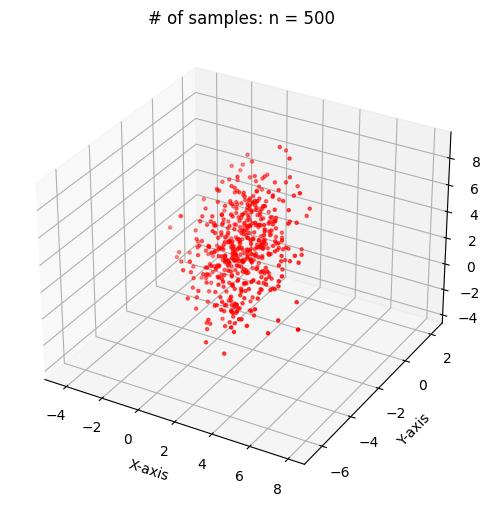

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os

def mle_gaussian(generate_data=True):
    # Display true parameters
    # Use NumPy arrays for vectors and matrices
    mu = np.array([1, -1.5, 2.5])  # mean vector
    Sigma = np.array([[3, -1.5, 1],
                      [-1.5, 2, 0.5],
                      [1, 0.5, 4]])  # covariance matrix

    print('True parameters')
    print('Mean vector:')
    print(mu)
    print('Covariance matrix:')
    print(Sigma) 

    # Check if a new dataset should be generated
    file_path = 'MLE_Gaussian.csv'

    if generate_data:
        n = 500  # number of samples
        print('# of samples: ', n)
        X = np.random.multivariate_normal(mu, Sigma, n)
        np.savetxt(file_path, X, delimiter=',')
    else:
        # Load data from the CSV file
        try:
            X = np.loadtxt(file_path, delimiter=',')
            n = X.shape[0]
        except FileNotFoundError:
            print(f"File '{file_path}' not found. Generating new data.")
            n = 500
            X = np.random.multivariate_normal(mu, Sigma, n)
            np.savetxt(file_path, X, delimiter=',')
    
    # Plot the 3D data
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c='r', marker='.')
    ax.set_title(f'# of samples: n = {n}')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    plt.grid(True)
    plt.draw()


    # Perform MLE
    print('\nMLE estimates')
    # The sum() function in NumPy sums along a specified axis.
    MLE_mu = np.sum(X, axis=0) / n
    print("MLE_mu:\n", MLE_mu)

    # Calculate MLE for the covariance matrix
    # The `T` attribute transposes the matrix, and `@` is for matrix multiplication.
    Xtmp = X - MLE_mu
    MLE_Sigma = (Xtmp.T @ Xtmp) / n
    print("MLE_Sigma:\n", MLE_Sigma)

# To run the function:
# Generate new data
mle_gaussian(generate_data=True)

# To load existing data
# mle_gaussian(generate_data=False)

plt.show()
